<img src="", width=150, ALIGN="left", border=20>
<center>
<h1>Air Quality Challenge Starting Kit</h1>
<br>This code was tested with <br>
Python 2.7.13 | Anaconda 4.3.1 (https://anaconda.org/)<br>
<a href="http://www.datascience-paris-saclay.fr">Paris Saclay Center for Data Science (CDS)</a>
</center>

ALL INFORMATION, SOFTWARE, DOCUMENTATION, AND DATA ARE PROVIDED "AS-IS". The CDS, CHALEARN, AND/OR OTHER ORGANIZERS OR CODE AUTHORS DISCLAIM ANY EXPRESSED OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR ANY PARTICULAR PURPOSE, AND THE WARRANTY OF NON-INFRIGEMENT OF ANY THIRD PARTY'S INTELLECTUAL PROPERTY RIGHTS. IN NO EVENT SHALL AUTHORS AND ORGANIZERS BE LIABLE FOR ANY SPECIAL, 
INDIRECT OR CONSEQUENTIAL DAMAGES OR ANY DAMAGES WHATSOEVER ARISING OUT OF OR IN CONNECTION WITH THE USE OR PERFORMANCE OF SOFTWARE, DOCUMENTS, MATERIALS, PUBLICATIONS, OR INFORMATION MADE AVAILABLE FOR THE CHALLENGE. 

# Introduction

The Air Quality challenge is a regression problem inspired from the Kaggle challenge <a href="https://www.kaggle.com/nelsonchu/air-quality-in-northern-taiwan">Air Quality in Northern Taiwan</a>, formatted in the AutoML format. 


In [41]:
model_dir = 'sample_code_submission/'          
problem_dir = 'ingestion_program/'  
score_dir = 'scoring_program/'
from sys import path; path.append(model_dir); path.append(problem_dir); path.append(score_dir); 
%matplotlib inline
%load_ext autoreload
%autoreload 2
import seaborn as sns; sns.set()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<h1> Step 1: Exploratory data analysis </h1>
We provide sample_data with the starting kit, but to prepare your submission, you must fetch the public_data from the challenge website and point to it.

In [42]:
datadir = 'sample_data'              # Change this to the directory where you put the input data
dataname = 'air'
!ls $datadir*

air_feat.name      air_test.data      air_train.solution
air_label.name     air_test.solution  air_valid.data
air_public.info    air_train.data     air_valid.solution


For convenience, we load the data as a "pandas" data frame, so we can use "pandas" and "seaborn" built in functions to explore the data. YOU MIGHT WANT TO KEEP THIS UNTIL THE NEXT YELLOW BLOCK.

In [43]:
from data_io import read_as_df
data = read_as_df(datadir  + '/' + dataname)                # The data are loaded as a Pandas Data Frame
target_name = data.columns.values[-1]                       # The last column is the target

Reading sample_data/air_train from AutoML format
Number of examples = 56480
Number of features = 14
Number of labels = 1


In [44]:
data.head()

,AMB_TEMP,CH4,CO,NMHC,O3,PM10,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,NOx
0,27.0,2.100000,1.73,0.610000,29.050903,42.0,67.0,2.7,2.700000,1.319917,145.220935,145.398063,2.416444,1.991696,93.0
1,29.0,1.928724,0.28,0.267695,37.000000,59.0,78.0,3.3,2.195732,1.319917,279.000000,314.000000,2.600000,0.900000,15.0
2,31.0,1.928724,0.44,0.267695,31.000000,40.0,61.0,9.8,2.195732,1.319917,116.000000,87.000000,1.700000,1.200000,20.0
3,17.0,1.928724,0.57,0.267695,3.600000,66.0,84.0,4.3,2.195732,1.319917,61.000000,58.000000,1.200000,0.700000,51.0
4,13.0,2.400000,0.87,0.490000,0.700000,56.0,83.0,3.4,2.900000,0.000000,248.000000,231.000000,0.800000,0.900000,48.0


In [45]:
data.describe() 

,AMB_TEMP,CH4,CO,NMHC,O3,PM10,RH,SO2,THC,UVB,WD_HR,WIND_DIREC,WIND_SPEED,WS_HR,NOx
count,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000,56480.000000
mean,23.340737,1.928878,0.564023,0.268099,29.068681,46.107633,75.808382,3.412048,2.196494,1.322046,145.446172,145.607097,2.407048,1.985635,26.875728
std,5.627341,0.152023,0.521045,0.157223,17.242120,179.404763,13.151818,5.362334,0.262611,0.814188,79.330740,80.236460,1.561973,1.542475,26.729425
min,-26.200000,-0.700000,-0.110000,-0.240000,-7.500000,-64.000000,0.000000,-6.600000,-0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.600000
25%,19.000000,1.900000,0.270000,0.230000,16.000000,26.000000,68.000000,1.700000,2.195732,1.319917,83.000000,82.000000,1.400000,0.900000,10.000000
50%,23.309805,1.928724,0.410000,0.267695,29.050903,37.000000,76.000000,2.600000,2.195732,1.319917,145.220935,145.398063,2.300000,1.900000,19.000000
75%,27.000000,1.928724,0.660000,0.267695,40.000000,51.000000,85.000000,4.000000,2.195732,1.319917,198.000000,198.000000,2.800000,2.400000,33.000000
max,59.000000,9.000000,23.000000,3.060000,161.000000,9999.000000,100.000000,311.000000,9.900000,12.000000,360.000000,360.000000,50.000000,50.000000,402.000000


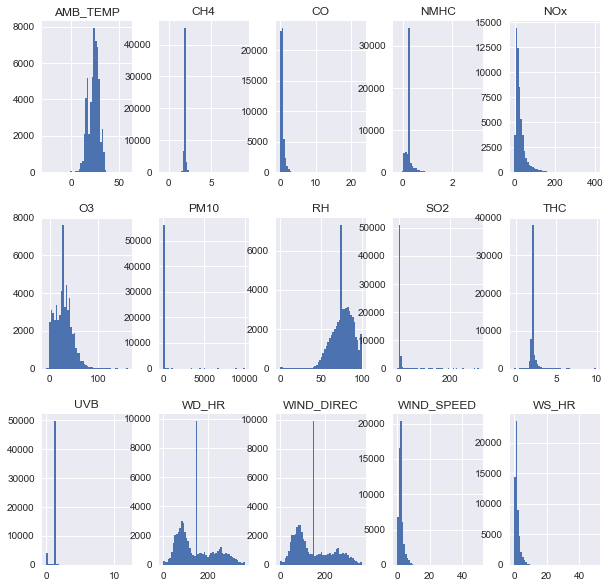

In [46]:
data.hist(figsize=(10, 10), bins=50, layout=(3, 5));

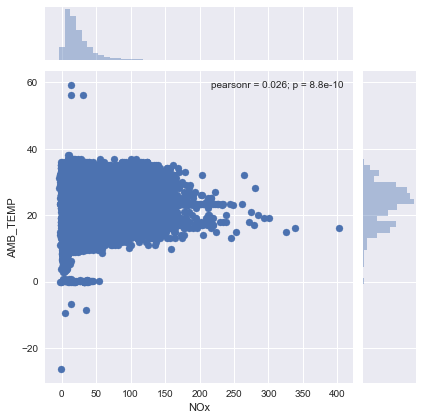

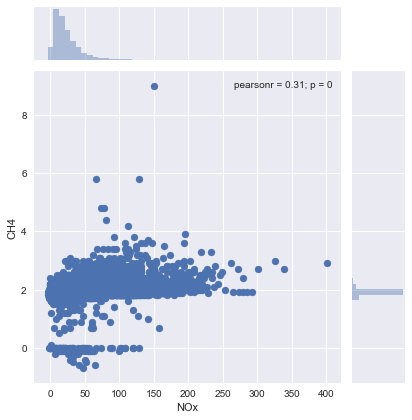

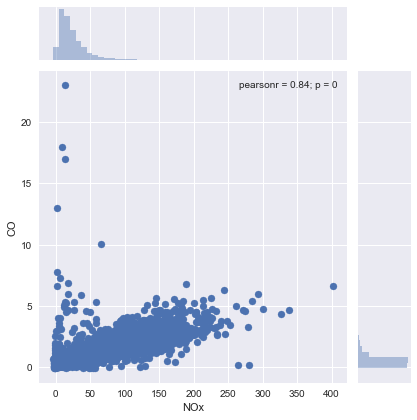

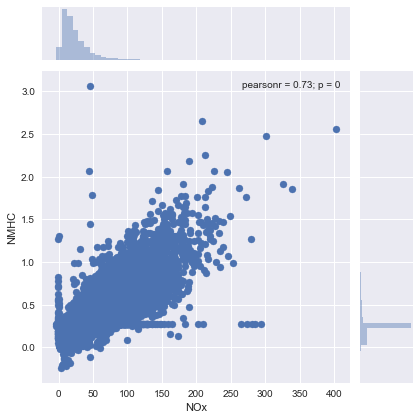

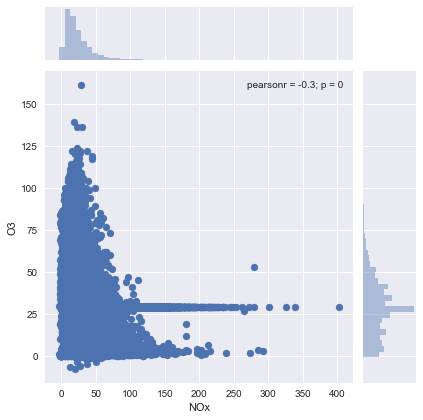

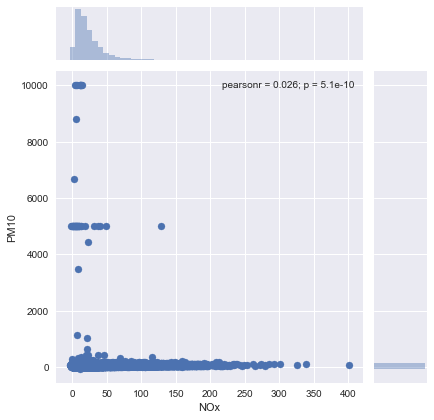

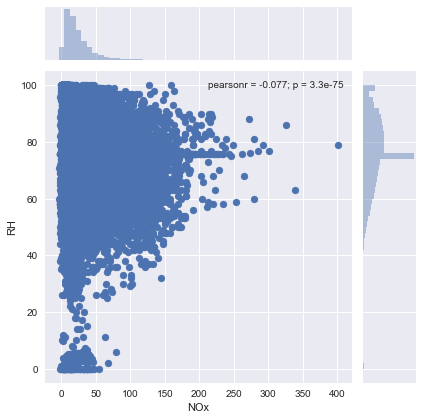

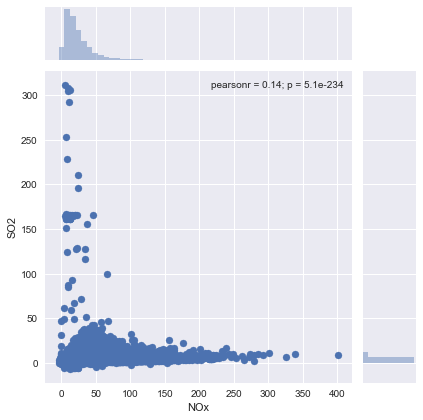

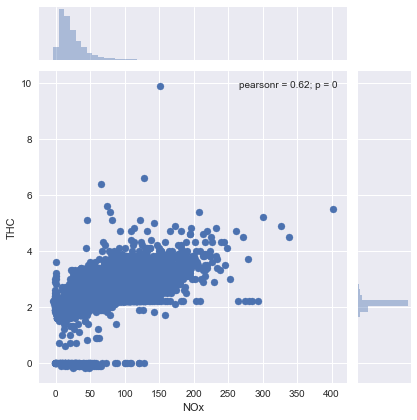

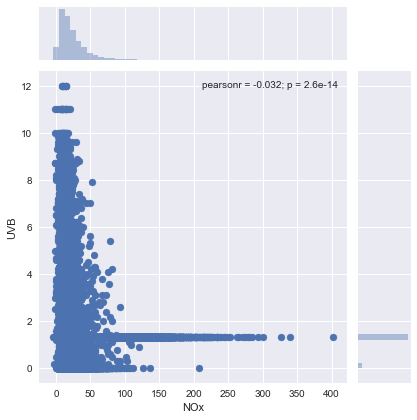

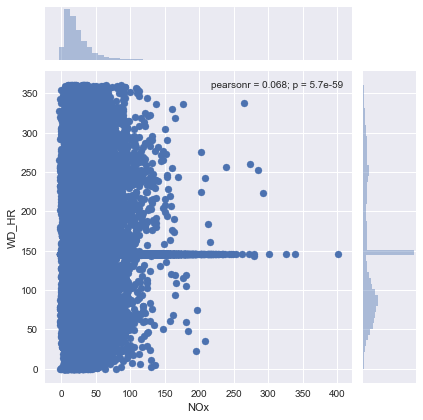

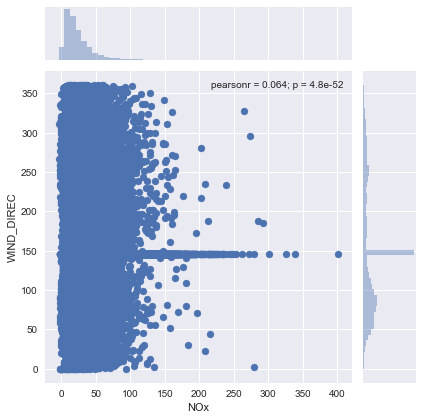

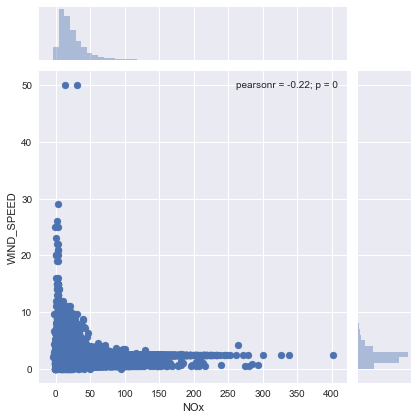

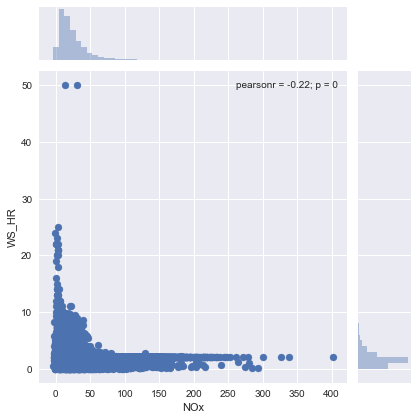

In [37]:
for i in range(len(data.columns.values)-1):
    sns.jointplot(x="NOx", y=data.columns.values[i], data=data)

# Step 2: Building a predictive model


## Loading data with DataManager
We reload the data with the AutoML DataManager class because this is more convenient:

In [48]:
from data_manager import DataManager
D = DataManager(dataname, datadir, replace_missing=True)
print D

Info file found : /Users/clementgarcin/Documents/MINI_PROJECT_ECOLO_TEAM/starting-kit/sample_data/air_public.info
-------------------- file_to_libsvm  ---------------------


ValueError: invalid literal for int() with base 10: '2.700000000000000000e+01'

In [40]:
print(datadir)

sample_data


## Training a predictive model
We provide an example of predictive model (for classification or regression) in the `sample_code_submission/` directory. It is a quite stupid model: it makes constant predictions. Replace it with your own model.

In [ ]:
from model import model
??model 

<h3>Create or reload model</h3>
Create an instance of the model (run the constructor) and attempt to reload a previously saved model from `sample_code_submission/*_model.pickle` if `reload_model=1`.<br>
If you saved have an aldeady trained model saved in sample_code_submission, the evaluation script will reload it and not retrain, just test. This will happen the second time you run the code because when the model is trained it gets saved. <br>
When you reload a model, you risk to reload a model trained on the wrong data. Delete `*_model.pickle` from `sample_code_submission/` if you do not want this to happen.

In [ ]:
M = model()   
reload_model=0                       # Change to 1 to reload an already trained model

trained_model_name = model_dir + dataname
if reload_model:    
    M = M.load(trained_model_name)                  # Attempts to re-load an already trained model

<h3> Training:</h3>

In [ ]:
X_train = D.data['X_train']
Y_train = D.data['Y_train']

if not(M.is_trained):                               # No need to train if model already trained
    M.fit(X_train, Y_train)  

### Making predictions:

In [ ]:
Y_hat_train = M.predict(D.data['X_train']) # Optional, not really needed to test on taining examples
Y_hat_valid = M.predict(D.data['X_valid'])
Y_hat_test = M.predict(D.data['X_test'])

### Saving:
Save the trained model (will be ready to reload next time around) and save the prediction results:

In [ ]:
M.save(trained_model_name)                 
result_name = 'sample_result_submission/' + dataname
from data_io import write
write(result_name + '_valid.predict', Y_hat_valid)
write(result_name + '_test.predict', Y_hat_test)
!ls $result_name*

## Scoring the results
### Load the challenge metric
<b>The metric chosen for your challenge</b> is identified in the "metric.txt" file found in the `scoring_function/` directory. We use here the `mse_metric` metric (an example of organizer-supplied metric found in `my_metric.py`), which computes the mean-square-error. You may change that in the "metric.txt" file to e.g. use `bac_multiclass`, one of the AutoML challenge metrics found in `libscores.py`, which is 2*(balanced_accuracy)-1.

In [ ]:
with open(score_dir + '/metric.txt', 'r') as f:
    metric_name = f.readline().strip()
import libscores, my_metric
try:
    scoring_function = getattr(libscores, metric_name)
except:
    scoring_function = getattr(my_metric, metric_name)
print 'Using scoring metric:', metric_name
??scoring_function

### Training performance
The participants normally posess target values (labels) only for training examples (except for the sample data). We compute with the `example` metric the training score, which should be zero for perfect predictions. 
<div style="background:#FFFFAA">
Isabelle: I found that the scoring program does not like when we compare a column vector and a line vector. This seems to be a problem only here.

In [ ]:
Y_train =  Y_train.ravel() # We need this conversion to a line vector

In [ ]:
print 'Training score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_hat_train)
print 'Ideal score for the', metric_name, 'metric = %5.4f' % scoring_function(Y_train, Y_train)

<div style="background:#FFFFAA">
<h4> Other metrics (optional):</h4>
You can here compare with other metrics.

In [ ]:
print 'Training score for the a_metric = %5.4f' % libscores.a_metric(Y_train, Y_hat_train)
print 'Ideal score for the a_metric = %5.4f' % libscores.a_metric(Y_train, Y_train)

<div style="background:#FFFFAA">
<H3> Cross-validation performance </H3>
The participants do not have access to the labels Y_valid and Y_test to self-assess their validation and test performances. But training performance is not a good prediction of validation or test performance. Using cross-validation, the training data is split into multiple training/test folds, which allows participants to self-assess their model during development. <br>
YOU MAY USE OTHER TYPES OF CV BUT KEEP THIS SECTION.


In [ ]:
from sklearn.model_selection import KFold
from numpy import zeros, mean
# 3-fold cross-validation
n = 3
kf = KFold(n_splits=n)
kf.get_n_splits(X_train)
i=0
scores = zeros(n)
for train_index, test_index in kf.split(X_train):
    Xtr, Xva = X_train[train_index], X_train[test_index]
    Ytr, Yva = Y_train[train_index], Y_train[test_index]
    M = model()
    M.fit(Xtr, Ytr)
    Yhat = M.predict(Xva)
    scores[i] = scoring_function(Yva, Yhat)
    print ('Fold', i+1, 'example metric = ', scores[i])
    i=i+1
print ('Average score = ', mean(scores))

# Step 3: Making a submission

## Unit testing

It is <b><span style="color:red">important that you test your submission files before submitting them</span></b>. All you have to do to make a submission is modify the file <code>model.py</code> in the <code>sample_code_submission/</code> directory, then run this test to make sure everything works fine. This is the actual program that will be run on the server to test your submission. 

In [ ]:
outdir = 'sample_result_submission'     

In [ ]:
!python $problem_dir/ingestion.py $datadir $outdir $problem_dir $model_dir

## Preparing the submission

Zip the contents of `sample_code_submission/` (without the directory), or download the challenge public_data and run the command in the previous cell, after replacing sample_data by public_data.
Then zip the contents of `sample_result_submission/` (without the directory).
<b><span style="color:red">Do NOT zip the data with your submissions</span></b>.